### 0.1 Detect and Remove the Outliers

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier
detection is referred to as outlier mining. There are many ways to detect the outliers, and the
removal process is the data frame same as removing a data item from the panda’s data frame.

Here pandas data frame is used for a more realistic approach as in real-world project need to detect
the outliers arouse during the data analysis step, the same approach can be used on lists and series-type objects.

Dataset: Dataset used is Boston Housing dataset as it is preloaded in the sklearn library.


In [1]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Detecting the outliers Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach. All of these are discussed below

1. Visualization

Example 1: Using Box Plot It captures the summary of the data effectively and efficiently
with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

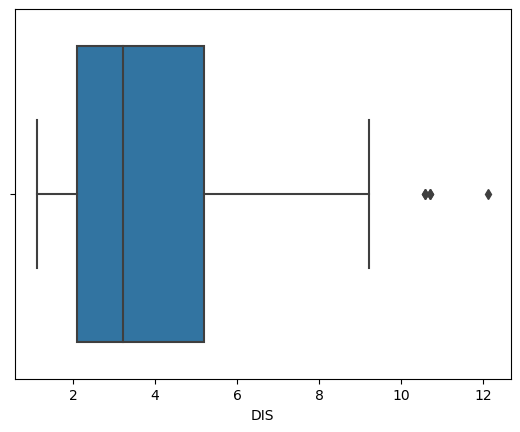

In [3]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In the above graph, can clearly see that values above 10 are acting as the outliers.

In [4]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


Example 2: Using ScatterPlot. It is used when you have paired numerical data, or when your
dependent variable has multiple values for each reading independent variable, or when trying to
determine the relationship between the two variables. In the process of utilizing the scatter plot,
one can also use it for outlier detection.

To plot the scatter plot one requires two variables that are somehow related to each other. So here,
‘Proportion of non-retail business acres per town’ and ‘Full-value property-tax rate per $10,000’
are used whose column names are “INDUS” and “TAX” respectively.

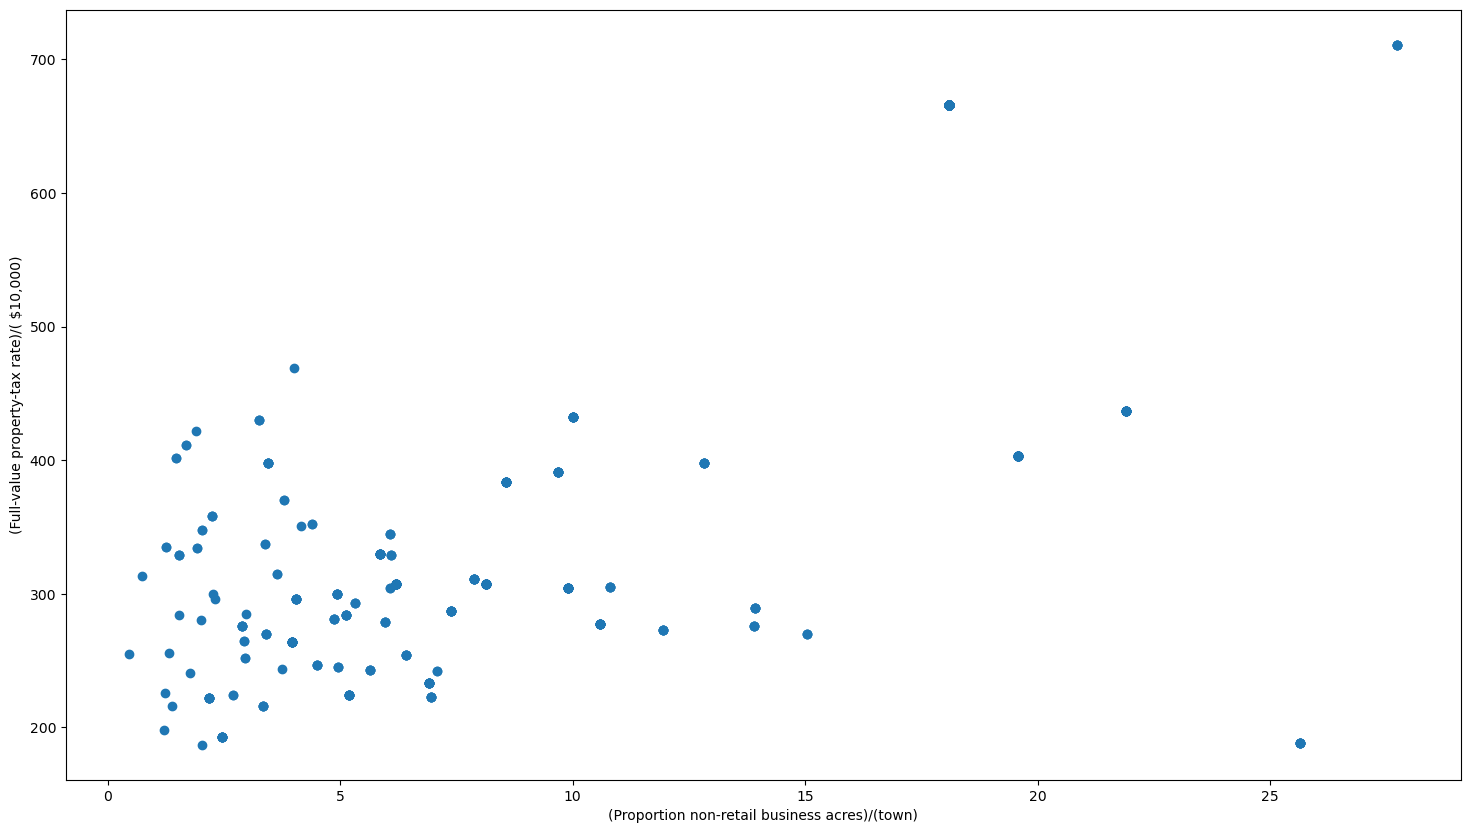

In [5]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

Looking at the graph can summarize that most of the data points are in the bottom left corner of
the graph but there are few points that are exactly;y opposite that is the top right corner of the
graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers. The
following code can fetch the exact position of all those points that satisfy these conditions.

In [6]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


2. Z-score Z- Score is also called a standard score. This value/score helps to understand that
how far is the data point from the mean. And after setting up a threshold value one can utilize z
score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [7]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


The above is the output of the data; the actual length of the list(z) is 506 that is the number of
rows. It prints the z-score values of each data item of the column

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data
points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [8]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355], dtype=int64),)


3. IQR (Inter Quartile Range) IQR (Inter Quartile Range) Inter Quartile Range approach
to finding the outliers is the most commonly used and most trusted approach used in the research
field.

IQR = Quartile3 – Quartile1

In [9]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                    interpolation = 'midpoint')
Q3 = np.percentile(df_boston['DIS'], 75,
                    interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

3.0646000000000004

To define the outlier base value is defined above and below datasets normal range namely Upper
and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR +
0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [11]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


Now that we know how to detect the outliers, it is important to understand if they needs to be
removed or corrected. In the next section we will consider a few methods of removing the outliers
and if required imputing new values.

Removing the outliers For removing the outlier, one must follow the same process of removing
an entry from the dataset using its exact position in the dataset because in all the above methods of
detecting the outliers end result is the list of all those data items that satisfy the outlier definition
according to the method used.

dataframe.drop( row_index, inplace = True

The above code can be used to drop a row from the dataset given the row_indexes to be dropped.
Inplace =True is used to tell python to make the required change in the original dataset. row_index
can be only one value or list of values or NumPy array but it must be one dimensional.

Example:
df_boston.drop(lists[0],inplace = True)

Full Code: Detecting the outliers using IQR and removing them.

In [12]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

''' Detection '''
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                        interpolation = 'midpoint')
Q3 = np.percentile(df_boston['DIS'], 75,
                        interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [13]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.61046
ZN          12.50000
INDUS       12.91000
CHAS         0.00000
NOX          0.17100
RM           0.73800
AGE         48.40000
DIS          3.02850
RAD         20.00000
TAX        387.00000
PTRATIO      2.80000
B           20.91000
LSTAT        9.97000
dtype: float64


Here we will get IQR for each column.

As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an
output with some true and false values. The data point where we have False that means these
values are valid whereas True indicates presence of an outlier.

In [15]:
print(df_boston < (Q1 - 1.5 * IQR)) |(df_boston > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

### Sample - Superstore

In [23]:
df_sample = df[['Customer Name','State','Sales','Profit']]\
.sample(n=50).copy()
df_sample['Sales'].iloc[5]=-1000.0
df_sample['Sales'].iloc[15]=-500.0

NameError: name 'df' is not defined

To plot the box plot, use the following code:

In [17]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

NameError: name 'df_sample' is not defined